In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV

In [68]:
df = pd.read_csv("train.csv").set_index("PassengerId")

In [69]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)

In [71]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df = df.drop(columns=["Name", "Ticket", "Cabin"], axis=1)

In [73]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [74]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [75]:
df.columns = [x.lower() for x in df.columns]

In [76]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [77]:
df = pd.get_dummies(df)

In [78]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,0,0,1
888,1,1,0,19.0,0,0,30.0000,0,0,1
889,0,3,0,NaN,1,2,23.4500,0,0,1


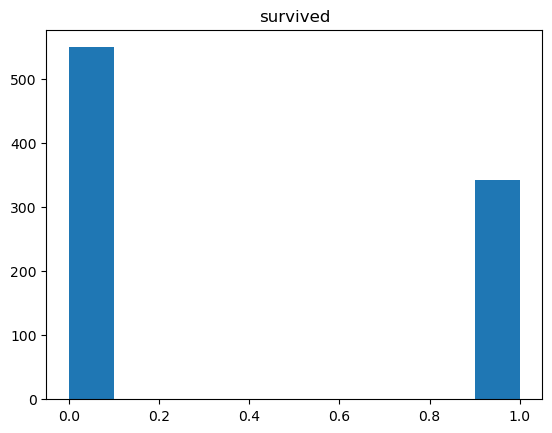

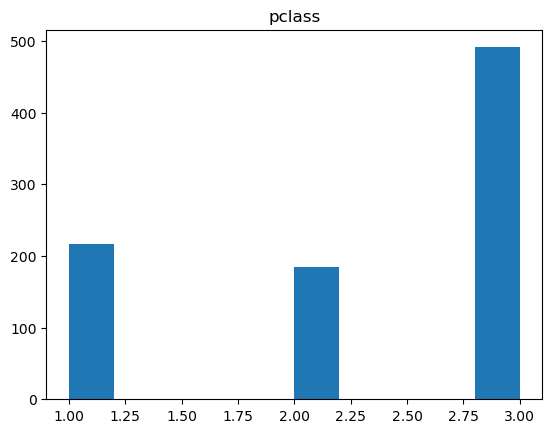

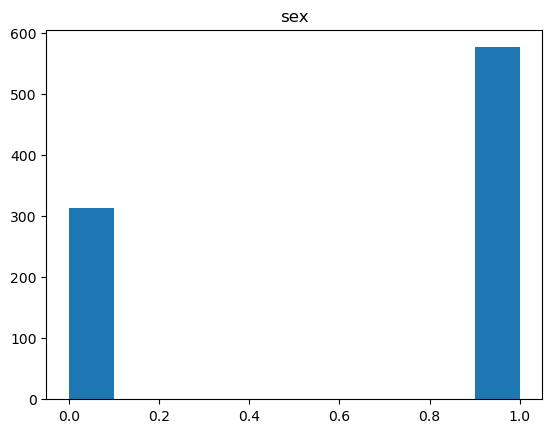

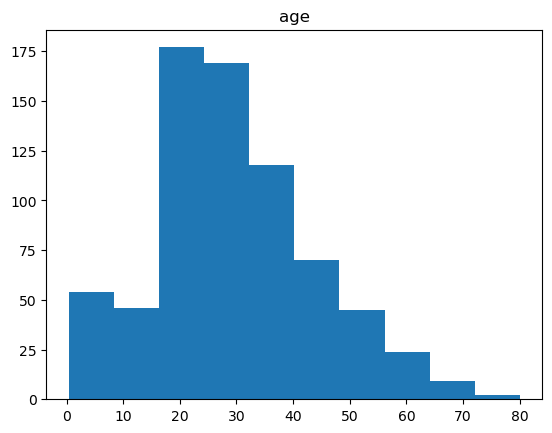

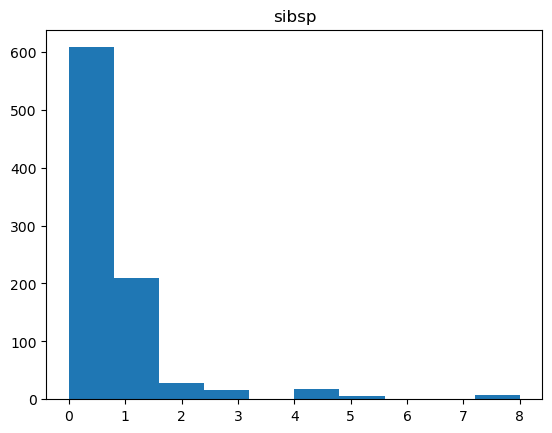

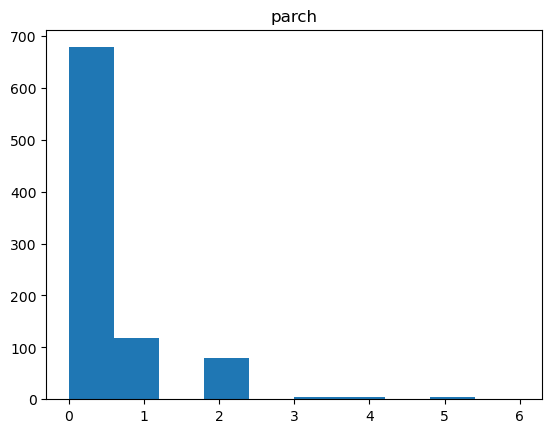

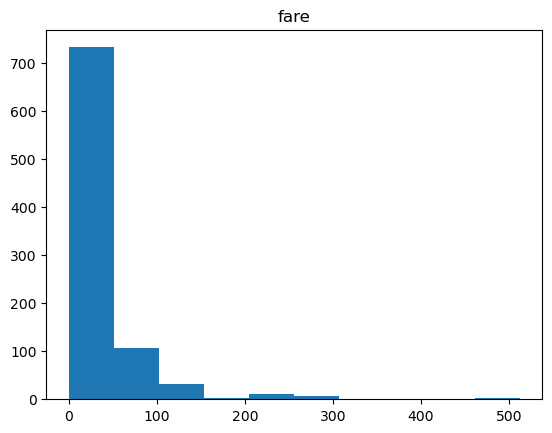

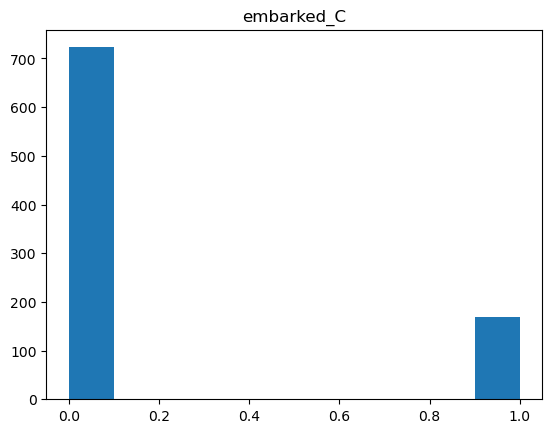

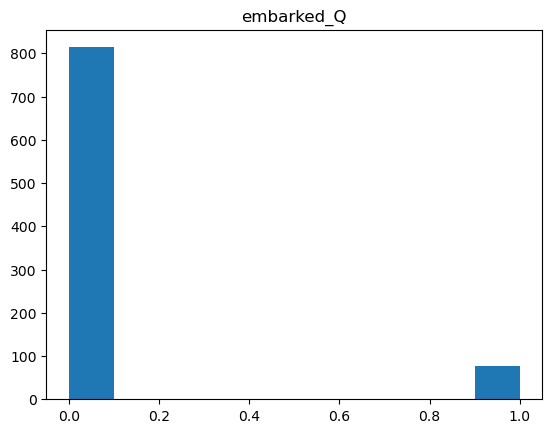

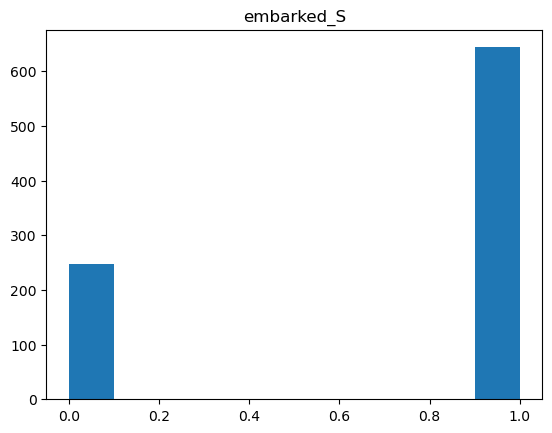

In [79]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(f"{i}")
    plt.show()

In [80]:
df["age"] = df["age"].fillna(df["age"].mean())

In [81]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [82]:
X = df.iloc[:, 1:]
y = df["survived"]

In [83]:
X.describe()

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [84]:
scaler = MinMaxScaler()
df[["age", "fare"]] = pd.DataFrame(scaler.fit_transform(X[["age", "fare"]]))

In [85]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,0.472229,1,0,0.139136,0,0,1
2,1,1,0,0.321438,1,0,0.015469,1,0,0
3,1,3,0,0.434531,0,0,0.103644,0,0,1
4,1,1,0,0.434531,1,0,0.015713,0,0,1
5,0,3,1,0.367921,0,0,0.016510,0,0,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         890 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        890 non-null    float64
 7   embarked_C  891 non-null    uint8  
 8   embarked_Q  891 non-null    uint8  
 9   embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.3 KB


In [87]:
df = df.dropna(subset=["fare"])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 1 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    890 non-null    int64  
 1   pclass      890 non-null    int64  
 2   sex         890 non-null    int64  
 3   age         890 non-null    float64
 4   sibsp       890 non-null    int64  
 5   parch       890 non-null    int64  
 6   fare        890 non-null    float64
 7   embarked_C  890 non-null    uint8  
 8   embarked_Q  890 non-null    uint8  
 9   embarked_S  890 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [90]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(X, y)

LogisticRegression(max_iter=10000)

In [91]:
lr.score(X, y)

0.8013468013468014

In [92]:
test = pd.read_csv("test.csv").set_index("PassengerId")

In [93]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
test["Sex"] = test["Sex"].apply(lambda x: 1 if x == "male" else 0)
test = test.drop(columns=["Name", "Ticket", "Cabin"], axis=1)
test.columns = [x.lower() for x in test.columns]
test = pd.get_dummies(test)
test["age"] = test["age"].fillna(test["age"].mean())
test["fare"] = test["fare"].fillna(test["fare"].mean())

In [95]:
test[test["fare"].isna()]

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
PassengerId,,,,,,,,,


In [96]:
test.describe()

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933
std,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.430019,0.313324,0.478803
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [97]:
scaler = MinMaxScaler()
test_scaled = test.copy()  # Make a copy of the original DataFrame
test_scaled["fare"] = scaler.fit_transform(np.array(test["fare"]).reshape(-1, 1))
test_scaled["age"] = scaler.fit_transform(np.array(test["age"]).reshape(-1, 1))

In [98]:
test_scaled.head()

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
PassengerId,,,,,,,,,
892,3,1,0.452723,0,0,0.015282,0,1,0
893,3,0,0.617566,1,0,0.013663,0,0,1
894,2,1,0.815377,0,0,0.018909,0,1,0
895,3,1,0.353818,0,0,0.016908,0,0,1
896,3,0,0.287881,1,1,0.023984,0,0,1


In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      418 non-null    int64  
 1   sex         418 non-null    int64  
 2   age         418 non-null    float64
 3   sibsp       418 non-null    int64  
 4   parch       418 non-null    int64  
 5   fare        418 non-null    float64
 6   embarked_C  418 non-null    uint8  
 7   embarked_Q  418 non-null    uint8  
 8   embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 24.1 KB


In [100]:
survived_pred = lr.predict(test_scaled)

In [101]:
survived_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [102]:
solution = pd.DataFrame({"PassengerId" : test_scaled.index, "Survived" : survived_pred})

In [103]:
solution

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [104]:
solution.to_csv("solution.csv", index=False)

In [105]:
sffs = SFS(lr,
          k_features=9,
          forward= True,
          floating= True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=10000),
                          floating=True, k_features=(9, 9), scoring='accuracy')

In [106]:
sffs.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.78675645]),
  'avg_score': 0.7867564534231201,
  'feature_names': ('sex',)},
 2: {'feature_idx': (1, 3),
  'cv_scores': array([0.79124579]),
  'avg_score': 0.7912457912457912,
  'feature_names': ('sex', 'sibsp')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.80022447]),
  'avg_score': 0.8002244668911336,
  'feature_names': ('pclass', 'sex', 'sibsp')},
 4: {'feature_idx': (0, 1, 3, 4),
  'cv_scores': array([0.80022447]),
  'avg_score': 0.8002244668911336,
  'feature_names': ('pclass', 'sex', 'sibsp', 'parch')},
 5: {'feature_idx': (0, 1, 3, 4, 7),
  'cv_scores': array([0.80022447]),
  'avg_score': 0.8002244668911336,
  'feature_names': ('pclass', 'sex', 'sibsp', 'parch', 'embarked_Q')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 8),
  'cv_scores': array([0.8047138]),
  'avg_score': 0.8047138047138047,
  'feature_names': ('pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked_S')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 6, 8),
  'cv_scores':

In [107]:
sbfs = SFS(lr,
          k_features=1,
          forward= False,
          floating= True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=10000),
                          floating=True, forward=False, k_features=(1, 1),
                          scoring='accuracy')

In [108]:
sbfs.subsets_

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.8013468]),
  'avg_score': 0.8013468013468014,
  'feature_names': ('pclass',
   'sex',
   'age',
   'sibsp',
   'parch',
   'fare',
   'embarked_C',
   'embarked_Q',
   'embarked_S')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 6, 7, 8),
  'cv_scores': array([0.80583614]),
  'avg_score': 0.8058361391694725,
  'feature_names': ('pclass',
   'sex',
   'age',
   'sibsp',
   'parch',
   'embarked_C',
   'embarked_Q',
   'embarked_S')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 6, 8),
  'cv_scores': array([0.80583614]),
  'avg_score': 0.8058361391694725,
  'feature_names': ('pclass',
   'sex',
   'age',
   'sibsp',
   'parch',
   'embarked_C',
   'embarked_S')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 8),
  'cv_scores': array([0.8047138]),
  'avg_score': 0.8047138047138047,
  'feature_names': ('pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked_S')},
 5: {'feature_idx': (0, 1, 2, 3, 8),
  'cv_scores': array([0.80246914]),
  'avg_score':

In [109]:
key_with_max_avg_score = max(sbfs.subsets_, key=lambda key: sbfs.subsets_[key]['avg_score'])

In [110]:
key_with_max_avg_score

8

In [111]:
predictors = list(sbfs.subsets_[key_with_max_avg_score]["feature_names"])

In [112]:
test_scaled2 = test_scaled[predictors]

In [117]:
lr2 = LogisticRegression(max_iter = 10000)
lr2.fit(X[predictors], y)

LogisticRegression(max_iter=10000)

In [118]:
lr.score(X,y)

0.8013468013468014

In [119]:
lr2.score(X[predictors],y)

0.8058361391694725

In [120]:
survived_pred2 = lr2.predict(test_scaled2)

In [121]:
solution2 = pd.DataFrame({"PassengerId" : test_scaled2.index, "Survived" : survived_pred2})

In [122]:
solution2

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [123]:
solution2.to_csv("solution2.csv", index=False)

In [124]:
(solution == solution2).value_counts()

PassengerId  Survived
True         True        418
dtype: int64

In [125]:
solution

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [126]:
C_array  = np.logspace(-3,2, 100)

In [127]:
tuning_C = {"C": C_array}

In [131]:
modelcv = LogisticRegressionCV( Cs=C_array,
                                  penalty='l2',
                                  scoring='accuracy', cv=5,
                                  random_state=42,max_iter=10000)
modelcv.fit(X[predictors], y)
print(modelcv.C_, modelcv.scores_[1].mean(axis=0).max())

[0.07390722] 0.7991274872889337


In [140]:
C_array  = np.logspace(-3,2, 100)
 
#Making a dict to enter as an input to param_grid
tuning_C = {'C':C_array}
clf = LogisticRegression(penalty = 'l1', solver =  'liblinear')
gs = GridSearchCV(clf, param_grid = tuning_C, scoring = 'accuracy', cv = 5)
gs.fit(X[predictors], y)
print(gs.best_params_)
print(gs.best_score_)

{'C': 9.770099572992246}
0.7923670830456343


In [142]:
m = LogisticRegression(max_iter=1000)
m.fit(X,y)
m.score(X, y)

0.8013468013468014

array([1.00000000e-03, 1.12332403e-03, 1.26185688e-03, 1.41747416e-03,
       1.59228279e-03, 1.78864953e-03, 2.00923300e-03, 2.25701972e-03,
       2.53536449e-03, 2.84803587e-03, 3.19926714e-03, 3.59381366e-03,
       4.03701726e-03, 4.53487851e-03, 5.09413801e-03, 5.72236766e-03,
       6.42807312e-03, 7.22080902e-03, 8.11130831e-03, 9.11162756e-03,
       1.02353102e-02, 1.14975700e-02, 1.29154967e-02, 1.45082878e-02,
       1.62975083e-02, 1.83073828e-02, 2.05651231e-02, 2.31012970e-02,
       2.59502421e-02, 2.91505306e-02, 3.27454916e-02, 3.67837977e-02,
       4.13201240e-02, 4.64158883e-02, 5.21400829e-02, 5.85702082e-02,
       6.57933225e-02, 7.39072203e-02, 8.30217568e-02, 9.32603347e-02,
       1.04761575e-01, 1.17681195e-01, 1.32194115e-01, 1.48496826e-01,
       1.66810054e-01, 1.87381742e-01, 2.10490414e-01, 2.36448941e-01,
       2.65608778e-01, 2.98364724e-01, 3.35160265e-01, 3.76493581e-01,
       4.22924287e-01, 4.75081016e-01, 5.33669923e-01, 5.99484250e-01,
      